<a href="https://colab.research.google.com/github/ChoiDae1/Machine-DeepLearing_Study/blob/main/%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%98_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28,28,1)/255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [3]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled,val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 23s 7ms/step - loss: 0.5266 - accuracy: 0.8106 - val_loss: 0.3353 - val_accuracy: 0.8792
Epoch 2/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3475 - accuracy: 0.8758 - val_loss: 0.2790 - val_accuracy: 0.8971
Epoch 3/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2955 - accuracy: 0.8934 - val_loss: 0.2505 - val_accuracy: 0.9067
Epoch 4/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2642 - accuracy: 0.9059 - val_loss: 0.2377 - val_accuracy: 0.9125
Epoch 5/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2395 - accuracy: 0.9119 - val_loss: 0.2474 - val_accuracy: 0.9071
Epoch 6/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2181 - accuracy: 0.9200 - val_loss: 0.2283 - val_accuracy: 0.9145
Epoch 7/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1990 - accuracy: 0.9265 - val_loss: 0.2157 - val_ac

In [4]:
model = keras.models.load_model('best-cnn-model.h5')
model.layers
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)
conv_weight = conv.weights[0].numpy()
print(conv_weight.mean(), conv_weight.std())

(3, 3, 1, 32) (32,)
-0.026658194 0.28514585


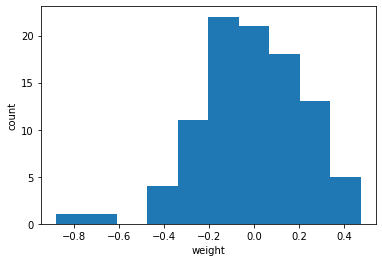

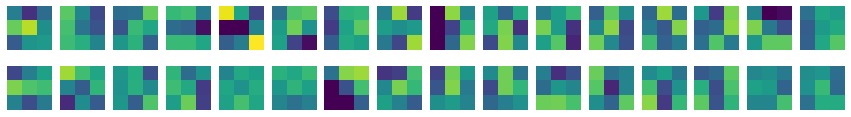

In [5]:
import matplotlib.pyplot as plt
plt.hist(conv_weight[0].reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weight[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()

(3, 3, 1, 32)
-0.0011199574 0.084393315


Text(0, 0.5, 'count')

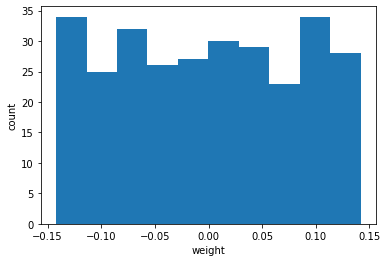

In [6]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)
no_training_weight = no_training_conv.weights[0].numpy()
print(no_training_weight.mean(), no_training_weight.std())
plt.hist(no_training_weight.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')

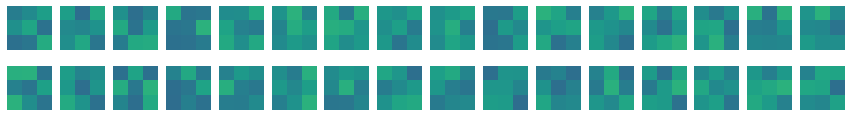

In [7]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(no_training_weight[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()

(60000, 28, 28)
(1, 28, 28, 32)


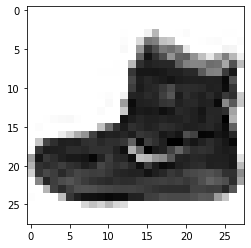

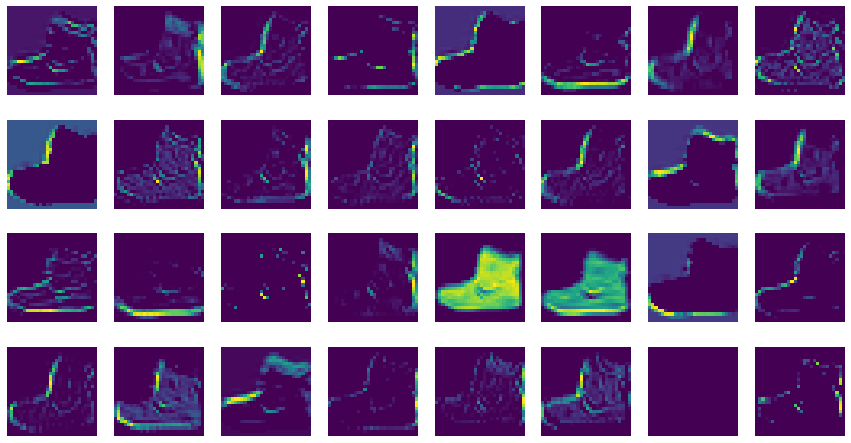

In [8]:
conv_acti = keras.models.Model(model.input,  model.layers[0].output)
print(train_input.shape)
plt.imshow(train_input[0], cmap='gray_r')
inputs = train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps = conv_acti.predict(inputs)
print(feature_maps.shape)

fig,axs = plt.subplots(4,8,figsize=(15,8))
for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()


(1, 14, 14, 64)


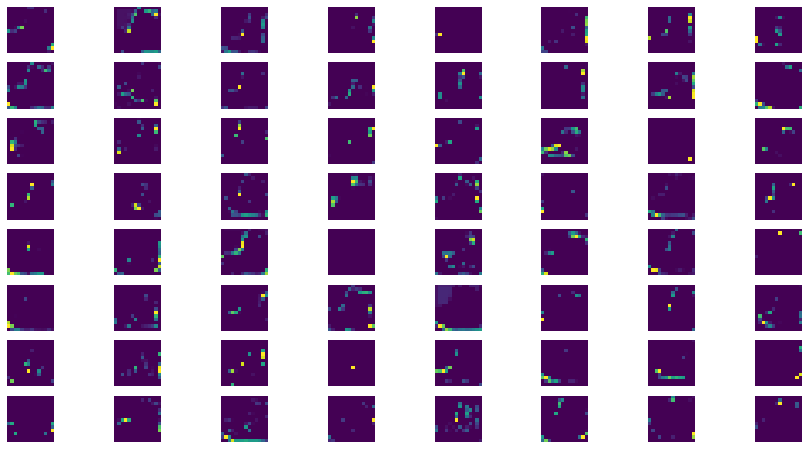

In [9]:
conv2_acti = keras.models.Model(model.input,  model.layers[2].output)
feature_maps = conv2_acti.predict(inputs)
print(feature_maps.shape)
fig,axs = plt.subplots(8,8,figsize=(15,8))
for i in range(8):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')

plt.show()